# Portfolio Management 1: Simulation and Statistics

Consider investing 1000 USD when Apple Inc went public. How much would you have today? What were the dynamics of that investment?

* Get Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import time
# datetime date uses the yyyy, mm, dd format
before = int(time.mktime(datetime.date(1980,12,12).timetuple()))# Starting date
today  = int(time.mktime(datetime.datetime.today().timetuple()))# Last date
ticker = 'aapl'
url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={before}&period2={today}&interval=1d&events=history&includeAdjustedClose=true"

df = pd.read_csv(url)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


* Compute Returns

In [2]:
df['ret'] = df['Adj Close'].pct_change()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ret
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800,-0.052167
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000,-0.073402
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600,0.024753
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600,0.028993


In [3]:
# Compute the value of the portfolio
# Long way

cum_ret = np.ones(len(df))
cum_ret[0] = 100
for i in range(len(cum_ret)):
    ret = df['ret'].iloc[i]
    if not np.isnan(ret):
        cum_ret[i] = cum_ret[i-1]*(1+ret)
df['cum_ret'] = cum_ret

# Convert dates
df['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df['Date']]

df.head()
#plt.plot(df['Date'],cum_ret)

,Date,Open,High,Low,Close,Adj Close,Volume,ret,cum_ret,date
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600,NaN,100.000000,1980-12-12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800,-0.052167,94.783300,1980-12-15
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000,-0.073402,87.826044,1980-12-16
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600,0.024753,90.000000,1980-12-17
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600,0.028993,92.609344,1980-12-18


In [4]:
type_2 = type(df['date'].loc[0])
type_1 = type(df['Date'].loc[0])
print(f"Original type is {type_1} new type is {type_2}")

Original type is <class 'str'> new type is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


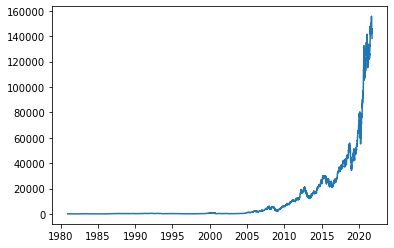

In [5]:
plt.plot(df['date'], df['cum_ret'])

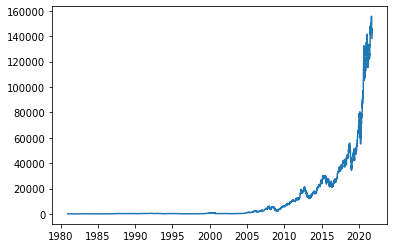

In [6]:
# Pythonic way
df['cum_ret_p'] = 100*(1 + df['ret']).cumprod() 
plt.plot(df['date'], df['cum_ret_p'])


## Simulate an equally weighted portfolio

In [24]:
def get_data(ticker, start_date, end_date):
    """Function that gets data from Yahoo Finance

    Args:
        ticker (str): Ticker symbol
        start_date (datetime): Initial date
        end_date (datetime): End date

    Returns:
        [DataFrame]: Pandas dataframe with the financial information
    """
    before = int(time.mktime(start_date.timetuple()))# Starting date
    today  = int(time.mktime(end_date.timetuple()))# Last date
    url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={before}&period2={today}&interval=1d&events=history&includeAdjustedClose=true"

    df = pd.read_csv(url)
    df['ticker'] = ticker
    df['Date'] =  [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df['Date']]
    return df

In [8]:
help(get_data)

Help on function get_data in module __main__:

get_data(ticker, start_date, end_date)
    Function that gets data from Yahoo Finance
    
    Args:
        ticker (str): Ticker symbol
        start_date (datetime): Initial date
        end_date (datetime): End date
    
    Returns:
        [DataFrame]: Pandas dataframe with the financial information



In [25]:
# Some nasdaq companies
from tqdm import tqdm
tickers = ['aapl', 'msft', 'goog', 'googl', 'amzn', 'tm', 'fb', 'tsla', 'tsm', 'jpm', 'nvda']
before = datetime.date(2010,1,1) # Starting date
today  = datetime.datetime.today() # Last date
df = pd.DataFrame()
for ticker in tqdm(tickers):
    time.sleep(0.5)
    df = df.append(get_data(ticker, before, today))

df.head()  

100%|██████████| 11/11 [00:07<00:00,  1.43it/s]


,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,aapl
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562588,493729600,aapl
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800,aapl
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469367,552160000,aapl
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457408,477131200,aapl


In [39]:
# Returns
df = df.sort_values(['ticker', 'Date'])

df['ret'] = df.groupby('ticker')['Adj Close'].pct_change()

df = df.dropna()
df = df.sort_values(['Date', 'ticker'])
df.head(len(tickers))

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,ret
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457408,477131200,aapl,-0.001849
4,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200,amzn,-0.017013
4,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685,goog,-0.023280
4,2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815771,googl,-0.023280
4,2010-01-07,43.790001,45.119999,43.610001,44.790001,33.348530,44864700,jpm,0.019809
4,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.561829,50559700,msft,-0.010399
4,2010-01-07,4.695000,4.715000,4.592500,4.627500,4.251390,54779200,nvda,-0.019597
4,2010-01-07,83.110001,83.839996,83.110001,83.790001,71.218132,377700,tm,-0.012376
4,2010-01-07,11.410000,11.440000,11.070000,11.110000,7.482699,27346600,tsm,-0.033072
5,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800,aapl,0.006648


In [44]:
weights = {}
for ticker in tickers:
    weights[ticker] = 1/len(tickers)
weights

df['weights'] = [weights[ticker] for ticker in df.ticker]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,ret,weights
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457408,477131200,aapl,-0.001849,0.090909
4,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200,amzn,-0.017013,0.090909
4,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685,goog,-0.023280,0.090909
4,2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815771,googl,-0.023280,0.090909
4,2010-01-07,43.790001,45.119999,43.610001,44.790001,33.348530,44864700,jpm,0.019809,0.090909


In [64]:
def weighted_return(x):
    return np.dot(x.ret, x.weights)

portfolio_returns = df.groupby('Date').apply(weighted_return)
dates = df.groupby('Date')['Date'].first()

In [60]:
# How do we check the code is right? Compare averages
means = df.groupby('ticker').ret.apply(np.mean)
w = np.array([weights[ticker] for ticker in tickers])
mean_1 = means.dot(w)
mean_2 = np.mean(portfolio_returns)

assert abs(mean_1 - mean_2) < 0.001


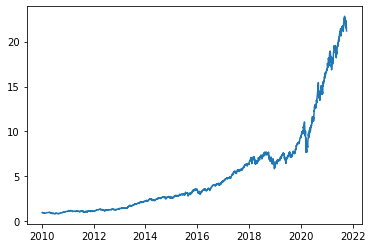

In [66]:
cum_returns = (1 + portfolio_returns).cumprod() 
plt.plot(dates, cum_returns)

## Statistics

Summary Statistics of Investment Strategy
-----------------------------------------
Annual Expected Return    : 1.35%
Annual Standard Deviation : 4.61%
Sharpe Ratio              : 0.94
Maximum Drawdown          : 30.66% 


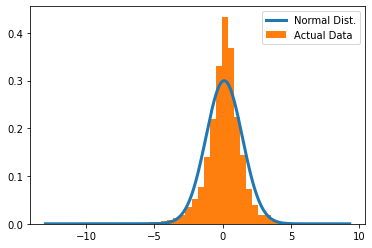

In [89]:

# Most statistics come from the numpy library
import scipy.stats as stats
from scipy.stats import normaltest

def summary_strategy(ret):
    print("Summary Statistics of Investment Strategy")
    print("-----------------------------------------")
    
    print(f"Annual Expected Return    : {round(np.mean(ret*100)*12,2)}%")
    print(f"Annual Standard Deviation : {round(np.std(ret*100)*(12**0.5),2)}%")

    # Risk free rate to compute Sharpe Ratios
    rf = 0.09/(100*12)
    print(f"Sharpe Ratio              : {round(12*(np.mean(ret)-rf)/np.std(ret),2)}")

    # Maximum drawdown
    cum_ret = (1+ret).cumprod()
    hwm     = cum_ret.cummax()
    dd      = (cum_ret-hwm)/hwm
    mdd     = max(-dd)
    print(f"Maximum Drawdown          : {round(mdd*100,2)}% ")
    
    xs = np.arange(100*ret.min(), 100*ret.max(), 0.01)
    fit = stats.norm.pdf(xs, np.mean(100*ret), np.std(100*ret))

    plt.plot(xs, fit, label='Normal Dist.', lw=3)
    plt.hist(100*ret, 50, density=True, label='Actual Data');
    plt.legend();
    

summary_strategy(portfolio_returns)